In [6]:
# Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
from pprint import pprint
from pandas import json_normalize
import gmaps
# rw import seaborn as sns

# Import API key
from api_keys import g_key


In [7]:
ageSexDF = pd.read_csv("resources/Provisional_COVID-19_Deaths_by_Sex_and_Age.csv")
ageSexDF_original = ageSexDF
ageSexDF.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,10/20/2021,01/01/2020,10/16/2021,By Total,NaN,NaN,United States,All Sexes,All Ages,723880.0,5928410.0,649389.0,369136.0,9372.0,1012160.0,NaN
1,10/20/2021,01/01/2020,10/16/2021,By Total,NaN,NaN,United States,All Sexes,Under 1 year,132.0,33432.0,367.0,16.0,23.0,506.0,NaN
2,10/20/2021,01/01/2020,10/16/2021,By Total,NaN,NaN,United States,All Sexes,0-17 years,542.0,59268.0,1043.0,138.0,189.0,1636.0,NaN
3,10/20/2021,01/01/2020,10/16/2021,By Total,NaN,NaN,United States,All Sexes,1-4 years,63.0,6236.0,210.0,16.0,65.0,322.0,NaN
4,10/20/2021,01/01/2020,10/16/2021,By Total,NaN,NaN,United States,All Sexes,5-14 years,172.0,9911.0,303.0,54.0,80.0,501.0,NaN


In [8]:
# cleanup tasks
# 1. get rid of "all age" and "all sex" rows because these are just combined from the different age groups and sexes
# 2. get rid of "by total" and "by year" - just added up from "by month"
# 3. get rid of "United States" - just added up from the individual states
filter1 = ageSexDF['Sex']!='All Sexes'
filter2 = ageSexDF['Age Group']!='All Ages'
filter3 = ageSexDF['Group']=='By Month'
#filter4 = ageSexDF['State']!='United States'
ageSexDF = ageSexDF.loc[filter1 & filter2 & filter3]

# 4. figure out the age groups - there is overlap
filter5 = ((ageSexDF['Age Group'] == '0-17 years') | 
           (ageSexDF['Age Group'] == '18-29 years') |
           (ageSexDF['Age Group'] == '30-39 years') |
           (ageSexDF['Age Group'] == '40-49 years') |
           (ageSexDF['Age Group'] == '50-64 years') |
           (ageSexDF['Age Group'] == '65-74 years') |
           (ageSexDF['Age Group'] == '75-84 years') |
           (ageSexDF['Age Group'] == '85 years and over'))
ageSexDF = ageSexDF.loc[filter5]

# 5. get rid of "Pneumonia.... or COVID-19 Deaths" and "Footnote" columns - they are added up as well from the covid, pneumonia death information
ageSexDF = ageSexDF.drop('Pneumonia, Influenza, or COVID-19 Deaths', axis = 1)
ageSexDF = ageSexDF.drop('Footnote', axis = 1)

ageSexDF.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths
8281,10/20/2021,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,Male,0-17 years,0.0,1666.0,50.0,0.0,36.0
8285,10/20/2021,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,Male,18-29 years,0.0,3218.0,75.0,0.0,26.0
8287,10/20/2021,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,Male,30-39 years,0.0,4300.0,138.0,0.0,49.0
8289,10/20/2021,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,Male,40-49 years,0.0,6087.0,261.0,0.0,83.0
8291,10/20/2021,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,Male,50-64 years,1.0,26094.0,1429.0,0.0,281.0


The maximum deaths by COVID-19 seemed to occur in the group of 85 years and over :Total COVID-19 Deaths    196633.0
dtype: float64


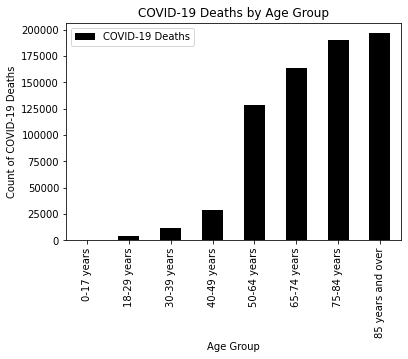

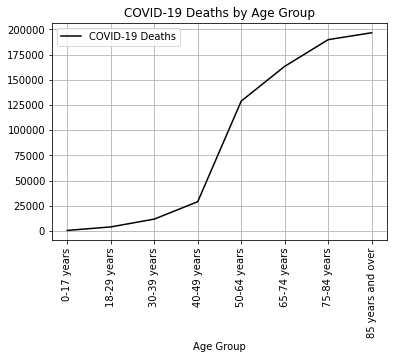

In [9]:
# once we get around 5 visualizations, we should stop - advice from Dr. A

# What age group is most susceptible and what are the differences among the age groups? - prashanth to break down into tasks
# bar chart showing each group
# it might make sense to make bigger age ranges for this...
#Clean the data by populating all the NaN values to 0 - TODO

#Filter the dataframe to get the vrecords by "UNited "
deaths_in_US_df = ageSexDF.loc[ageSexDF["State"] == "United States"]

# Prep the data - create a dataframe for just the age groups. Combine both male and female by age group OR Create - 
deaths_by_age_group_df = pd.DataFrame(deaths_in_US_df.groupby("Age Group").sum() ["COVID-19 Deaths"])

# Plot -  a bar chart (Age range vs. Covid Death Count) and/or a Line chart
deaths_by_age_group_df.plot(kind="bar", color="black")
plt.ylabel("Count of COVID-19 Deaths")
plt.title("COVID-19 Deaths by Age Group") 

plt.savefig("Charts/covid_19_deaths_by_age_group_bar.png")

deaths_by_age_group_df.plot(kind="line", color="black")
#plt.ylabel("Count of COVID-19 Deaths")
plt.title("COVID-19 Deaths by Age Group")
plt.xticks(rotation="90")
plt.grid()
plt.savefig("Charts/covid_19_deaths_by_age_group_line.png")


# Analyze and summarize the findings
print(f"The maximum deaths by COVID-19 seemed to occur in the group of 85 years and over :Total {deaths_by_age_group_df.max()}")
    



In [14]:
'''# Is geographic location a factor in the number of deaths? - prashanth to break down into tasks
# Probably need to get the state populations for this. - an api call to fill out the data frame

# All the census API to get the population by state and gender
census_api_url = "https://api.census.gov/data/2019/pep/charagegroups?get=NAME,POP&SEX=1,2&for=state:*"
response = requests.get(census_api_url).json()
census_df = pd.DataFrame(response)


#census_df.to_excel("Output_data/census.xlsx")
census_df.columns = census_df.iloc[0]
census_df = census_df[1:]

#Replace the values in the Sex column 
census_df["SEX"].replace({"1":"Male", "2": "Female"}, inplace=True)

#Rename Sex to Gender and state to StateID of the columns
census_df.rename(columns={"NAME": "State", "POP": "Population", "SEX": "Gender", "state": "State ID"}, inplace=True)

#Save the census data in the output folder
census_df.to_excel("Output_data/census.xlsx", index=False, sheet_name="Census Data")

#Create the dataframe for COVID-19 deaths by state
deaths_by_state_df = ageSexDF.loc[ageSexDF["State"] != "United States"]
deaths_by_state_df.head()

#group by state
state_info_df = pd.DataFrame(deaths_by_state_df.groupby(by="State").sum() ["COVID-19 Deaths"])

#Convert the population values to an Integer as it is stored as a String value
census_df["Population"] = census_df["Population"].astype("int")

#Create the population by state dataframe
population_by_state_df = pd.DataFrame(census_df.groupby(by="State").sum() ["Population"])


#Merge population and census dataframes using State as the key
state_info_df = pd.merge(state_info_df, population_by_state_df, how="inner", on="State")

#Calculate the percentage of deaths by state
state_info_df["Death Percentage"] = state_info_df["COVID-19 Deaths"] / state_info_df["Population"].sum()
state_info_df["Death Percentage"] = state_info_df["Death Percentage"].astype("float")

state_info_df = state_info_df.reset_index()

#Read the Lat Long xlsx and merge it into the state_info_df dataframe

lat_long_df = pd.read_excel("resources/lat_long.xlsx")
state_info_df = pd.merge(state_info_df, lat_long_df, how = "inner", on="State")


#plt.scatter(state_info_df["Lat"], state_info_df["Death Percentage"], marker="")

lat_plt = sns.scatterplot(state_info_df["Lat"], state_info_df["Death Percentage"])

#lng_plt = sns.scatterplot(state_info_df["Lng"], state_info_df["Death Percentage"])

# Plot a heat map using google maps  - use number of deaths as weight - prashanth

# Analyze and summarize the findings # latlong.net - can help with the heat map - prashanth'''


placeholder


'# Is geographic location a factor in the number of deaths? - prashanth to break down into tasks\n# Probably need to get the state populations for this. - an api call to fill out the data frame\n\n# All the census API to get the population by state and gender\ncensus_api_url = "https://api.census.gov/data/2019/pep/charagegroups?get=NAME,POP&SEX=1,2&for=state:*"\nresponse = requests.get(census_api_url).json()\ncensus_df = pd.DataFrame(response)\n\n\n#census_df.to_excel("Output_data/census.xlsx")\ncensus_df.columns = census_df.iloc[0]\ncensus_df = census_df[1:]\n\n#Replace the values in the Sex column \ncensus_df["SEX"].replace({"1":"Male", "2": "Female"}, inplace=True)\n\n#Rename Sex to Gender and state to StateID of the columns\ncensus_df.rename(columns={"NAME": "State", "POP": "Population", "SEX": "Gender", "state": "State ID"}, inplace=True)\n\n#Save the census data in the output folder\ncensus_df.to_excel("Output_data/census.xlsx", index=False, sheet_name="Census Data")\n\n#Create t

In [ ]:
# What effect does sex have on covid mortality?
# more male vs females?
# might need state population data males and females for this one

# Tasks:
# Create a dataframe for covid-19 death count by gender and state - Yang
# Call to an API to get the state population by gender - Yang
# Add the population information to the dataframe - Yang
# Create necessary stats - mainly percentage by gender and state
# Plot a pie chart to show the percentages of death by gender  - overall - Hannah
# Draw a line chart to show the percntage by state (for all the 50 states) - (Can also be a bar chart) - Hannah
# Analyze and summarize the findings -  Determine if there is a trend - Hannah


"\nThere is a big peak in April 2020 and the maximum occurs in January 2021 with 209928 deaths. There's another \nPeak in September 2021 but that may just be an increasing trend - we don't have a full month of data for October 2021 yet.\n"

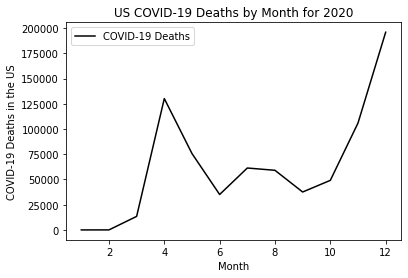

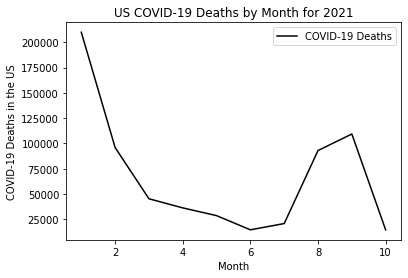

In [41]:
# Time - what period was the peak of covid mortality?
# How many waves were there?

# Tasks:
# Create a dataframe for covid-19 death count by months - Randy
# There's probably a cleaner way to to it but I'm going to make a df for 2020 and another one for 2021
ageSex2020DF = ageSexDF.loc[ageSexDF["Year"] == 2020]
ageSex2021DF = ageSexDF.loc[ageSexDF["Year"] == 2021]
monthlyDeaths2020DF = pd.DataFrame(ageSex2020DF.groupby(by="Month").sum() ["COVID-19 Deaths"])
monthlyDeaths2021DF = pd.DataFrame(ageSex2021DF.groupby(by="Month").sum() ["COVID-19 Deaths"])
monthlyDeaths2020DF

# Draw a line chart (Year-Monnth Vs. Covid-19 Death count) - Randy
monthlyDeaths2020DF.plot(color = 'black')
plt.ylabel("COVID-19 Deaths in the US")
plt.title("US COVID-19 Deaths by Month for 2020")
plt.savefig("Charts/covid_19_deaths_by_month_2020_line.png")



monthlyDeaths2021DF.plot(color = 'black')
plt.ylabel("COVID-19 Deaths in the US")
plt.title("US COVID-19 Deaths by Month for 2021")
plt.savefig("Charts/covid_19_deaths_by_month_2021_line.png")

# Analyze and summarize the findings -  Determine the peaks in the death count by examining the line chart - Randy
'''
There is a big peak in April 2020 and the maximum occurs in January 2021 with 209928 deaths. There's another 
Peak in September 2021 but that may just be an increasing trend - we don't have a full month of data for October 2021 yet.
'''

# to do: change x axis labels to the actual month names, add y axis title, save plots
